# COGS 108 - Drugs and Personality

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

We looked at data gathered from a survey about people's drug use which also included their personality types as well as other data. We wanted to know if there was a correlation between drug use and personality types specifically but found no correlation and were unable to predict personality type based on drug use.

# Names

- Hima Kathi
- Rasya Soeroso
- Kayla Sacks
- Brian Xie

<a id='research_question'></a>
# Research Question

Can we predict an individual's personality type based on their drug consumption?

<a id='background'></a>

## Background & Prior Work

With the prevalence of drug consumption on university campuses, our team was initially interested on what type of factors could affect an individual's choice to partake in drug activities. While other factors, like an individual’s environment, family and genetics, can affect this likelihood, our team was fascinated with which personality types would be more prone to drug use. Using the five-factor model, which sets five general personality domains, we can easily quantify our participants in categorical classes. In this model, the five personality types included are neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness. From there, we can analyze the demographics of participants in each class to further understand the relationship between personality types and drug consumption. 

Our team was inspired by a research project from BMC Psychiatry, where they focused on the relationship between an individual and type of drug consumption based on the dataset from UC Irvine. In their paper, researchers observed a strong correlation with specificity and sensitivity of the drug, and were able to confirm this relationship. In UC Irvine’s data set, participants were asked about their experience with 18 legal and illegal drugs, and featured attributes, like education and country of origin, were also collected to quantify the data. 
    
References (include links):
- 1) https://www.kaggle.com/obeykhadija/drug-consumptions-uci
- 2) https://bmcpsychiatry.biomedcentral.com/articles/10.1186/1471-244X-8-22

# Hypothesis


Yes, we can predict an individual's personality type based on their drug consumption, because there is a correlation between the personality types and drug consumptions.

# Dataset(s)

- **Dataset Name:** Drug Consumptions (UCI): Classify type of drug consumer by personality data
- **Link to the dataset:** https://www.kaggle.com/obeykhadija/drug-consumptions-uci?select=Drug_Consumption.csv
- **Number of observations:** 1884
- **Number of variables:** 32
    1. ID: a number of records in an original database. Cannot be related to the participant. It can be used for reference only.
    2. Age: the age of participant
    3. Gender: Male or Female
    4. Education: level of education of participant
    5. Country: country of origin of the participant
    6. Ethnicity: ethnicity of participant
    7. Nscore (Real) is NEO-FFI-R Neuroticism (extreme negative values means very low neuroticism, extreme positive means very high)
    8. Escore (Real) is NEO-FFI-R Extraversion (extreme negative values means very low extraversion, extreme positive means very high)
    9. Oscore (Real) is NEO-FFI-R Openness to experience (extreme negative values means very low openness, extreme positive means very high)
    10. Ascore (Real) is NEO-FFI-R Agreeableness (extreme negative values means very low agreeableness, extreme positive means very high)
    11. Cscore (Real) is NEO-FFI-R Conscientiousness (extreme negative values means very low conscientiousness, extreme positive means very high)
    12. Impulsive (Real) is impulsiveness measured by BIS-11 (extreme negative values means very low impulsiveness, extreme positive means very high)
    13. SS (Real) is sensation seeing measured by ImpSS (extreme negative values means very low sensation seeking, extreme positive means very high)
    14. Alcohol: alcohol consumption
    15. Amphet: amphetamines consumption
    16. Amyl: nitrite consumption
    17. Benzos: benzodiazepine consumption
    18. Caff: caffeine consumption
    19. Cannabis: marijuana consumption
    20. Choc: chocolate consumption
    21. Coke: cocaine consumption
    22. Crack: crack cocaine consumption
    23. Ecstasy: ecstasy consumption
    24. Heroin: heroin consumption
    25. Ketamine: ketamine consumption
    26. Legalh: legal highs consumption
    27. LSD: LSD consumption
    28. Meth: methadone consumption
    29. Mushroom: magic mushroom consumption
    30. Nicotine: nicotine consumption
    31. Semer: class of fictitious drug Semeron consumption (i.e. control)
    32. VSA: class of volatile substance abuse consumption

Rating's for Drug Use (possible entries for variable 14-32):
- CL0: Never Used
- CL1: Used over a Decade Ago
- CL2: Used in Last Decade
- CL3: Used in Last Year 
- CL4: Used in Last Month
- CL5: Used in Last Week
- CL6: Used in Last Day

*Note: the dataset is originated from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#).*

# Setup

In [712]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Statmodels & patsy
import patsy
import statsmodels.api as sm

#improve resolution
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [713]:
df = pd.read_csv('Drug_Consumption.csv')
df.head()

ID    Age Gender                          Education Country Ethnicity  \
0   2  25-34      M                   Doctorate degree      UK     White   
1   3  35-44      M  Professional certificate/ diploma      UK     White   
2   4  18-24      F                     Masters degree      UK     White   
3   5  35-44      F                   Doctorate degree      UK     White   
4   6    65+      F            Left school at 18 years  Canada     White   

    Nscore   Escore   Oscore   AScore  ...  Ecstasy  Heroin  Ketamine Legalh  \
0 -0.67825  1.93886  1.43533  0.76096  ...      CL4     CL0       CL2    CL0   
1 -0.46725  0.80523 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0   
2 -0.14882 -0.80615 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0   
3  0.73545 -1.63340 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1   
4 -0.67825 -0.30033 -1.55521  2.03972  ...      CL0     CL0       CL0    CL0   

   LSD Meth Mushrooms Nicotine Semer  VSA  
0  CL2  CL3       CL0      CL4   CL0  CL0  
1  CL0  CL0       CL1      CL0   CL0  CL0  
2  CL0  CL0       CL0      CL2   CL0  CL0  
3  CL0  CL0       CL2      CL2   CL0  CL0  
4  CL0  CL0       CL0      CL6   CL0  CL0  

[5 rows x 32 columns]

Since we only have one dataframe, we can drop the ```ID``` variable.

In [714]:
df = df.drop('ID', axis=1)

Standardize the drug use ratings by extracting the last digit of each entry.

In [715]:
def standardize_drugs_freq(str_in):
    try:
        output = int(str_in[2:])
    except:
        output = np.nan
    return output

In [716]:
drug_types = list(df.columns)[12:]
df[drug_types] = df[drug_types].applymap(standardize_drugs_freq)

In [717]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

We can see from the above cell that there is an inconsistency in one of the column names.

In [718]:
df = df.rename(columns={'AScore': 'Ascore'})

According to the UCI Machine Learning Repository website, "...participants were questioned concerning their use of ... one fictitious drug (Semeron) which was introduced to identify over-claimers." Therefore, we can drop those who are over-claimers of drug use and drop the Semer column.

In [719]:
df = df.drop(df[df['Semer'] != 0].index) # drop rows of overclaimers
df = df.drop('Semer', axis=1) # drop semer column
df = df.reset_index(drop='True') # reset index to fix dataframe

In [720]:
df.shape

(1876, 30)

In [721]:
df.isnull().sum(axis=0)

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
VSA          0
dtype: int64

Out of the 30 columns that we had, we did not find any null values. Therefore, we do do not need to drop any rows based on missing data.

In [722]:
df[list(df.columns)[5:12]].describe()

Nscore       Escore       Oscore       Ascore       Cscore  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean     -0.000718    -0.001646    -0.002915    -0.000169    -0.000391   
std       0.998682     0.997596     0.995866     0.996730     0.997923   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.628243   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

         Impulsive           SS  
count  1876.000000  1876.000000  
mean      0.005412    -0.006782  
std       0.954389     0.961949  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730

All the values in our quantitative columns are within reasonable range (-3.5, 3.5). Therefore, we do not need to remove any outliers based off lack of validity.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [723]:
df.head()

Age Gender                          Education Country Ethnicity   Nscore  \
0  25-34      M                   Doctorate degree      UK     White -0.67825   
1  35-44      M  Professional certificate/ diploma      UK     White -0.46725   
2  18-24      F                     Masters degree      UK     White -0.14882   
3  35-44      F                   Doctorate degree      UK     White  0.73545   
4    65+      F            Left school at 18 years  Canada     White -0.67825   

    Escore   Oscore   Ascore   Cscore  ...  Crack  Ecstasy  Heroin  Ketamine  \
0  1.93886  1.43533  0.76096 -0.14277  ...      0        4       0         2   
1  0.80523 -0.84732 -1.62090 -1.01450  ...      0        0       0         0   
2 -0.80615 -0.01928  0.59042  0.58489  ...      0        0       0         2   
3 -1.63340 -0.45174 -0.30172  1.30612  ...      0        1       0         0   
4 -0.30033 -1.55521  2.03972  1.63088  ...      0        0       0         0   

   Legalh  LSD  Meth  Mushrooms  Nicotine  VSA  
0       0    2     3          0         4    0  
1       0    0     0          1         0    0  
2       0    0     0          0         2    0  
3       1    0     0          2         2    0  
4       0    0     0          0         6    0  

[5 rows x 30 columns]

We now group the different drugs into 7 drug categories: **CNS Stimulant, CNS Depressant, Hallucinogen, Cannabis, Narcotic Analgesics (NA), Dissociative Anesthetics (DA), and Inhalant**. Compute the likelihood of each observation taking these drugs and normalize so that the value is in the scale between 0 (least likely) and 1 (most likely).

In [724]:
depressant = ['Alcohol', 'Benzos']
stimulant = ['Amphet', 'Caff', 'Choc', 'Coke', 'Crack', 'Legalh', 'Meth', 'Nicotine']
hallucinogen = ['Ecstasy', 'Legalh', 'LSD', 'Mushrooms']
inhalant = ['Amyl', 'VSA']
cannabis = ['Cannabis']
NA = ['Heroin']
DA = ['Ketamine']
categories = ['CNSStimulant', 'CNSDepressant', 'Hallucinogen','Cannabis', 'NA', 'DA','Inhalant']

In [725]:
drugs_list = [stimulant, depressant, hallucinogen, cannabis, NA, DA, inhalant]

In [726]:
for i in range(len(categories)):
    sum_col = 0
    for drug in drugs_list[i]:
        sum_col += df[drug]
    df[categories[i]] = sum_col / (6*len(drug))

In [727]:
df_new = df[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'CNSStimulant', 'CNSDepressant', 'Hallucinogen', 'Cannabis',
       'NA', 'DA', 'Inhalant']]
df_new.head()

Nscore   Escore   Oscore   Ascore   Cscore  CNSStimulant  CNSDepressant  \
0 -0.67825  1.93886  1.43533  0.76096 -0.14277      0.500000       0.138889   
1 -0.46725  0.80523 -0.84732 -1.62090 -1.01450      0.208333       0.166667   
2 -0.14882 -0.80615 -0.01928  0.59042  0.58489      0.270833       0.194444   
3  0.73545 -1.63340 -0.45174 -0.30172  1.30612      0.333333       0.111111   
4 -0.67825 -0.30033 -1.55521  2.03972  1.63088      0.333333       0.055556   

   Hallucinogen  Cannabis   NA        DA  Inhalant  
0      0.111111  0.083333  0.0  0.041667  0.111111  
1      0.018519  0.062500  0.0  0.000000  0.000000  
2      0.000000  0.041667  0.0  0.041667  0.000000  
3      0.074074  0.062500  0.0  0.000000  0.055556  
4      0.000000  0.000000  0.0  0.000000  0.000000

First we wanted to see if there are any visible correlations between OCEAN Scores and the different drug categories, so we made a scattermatrix with those variables.

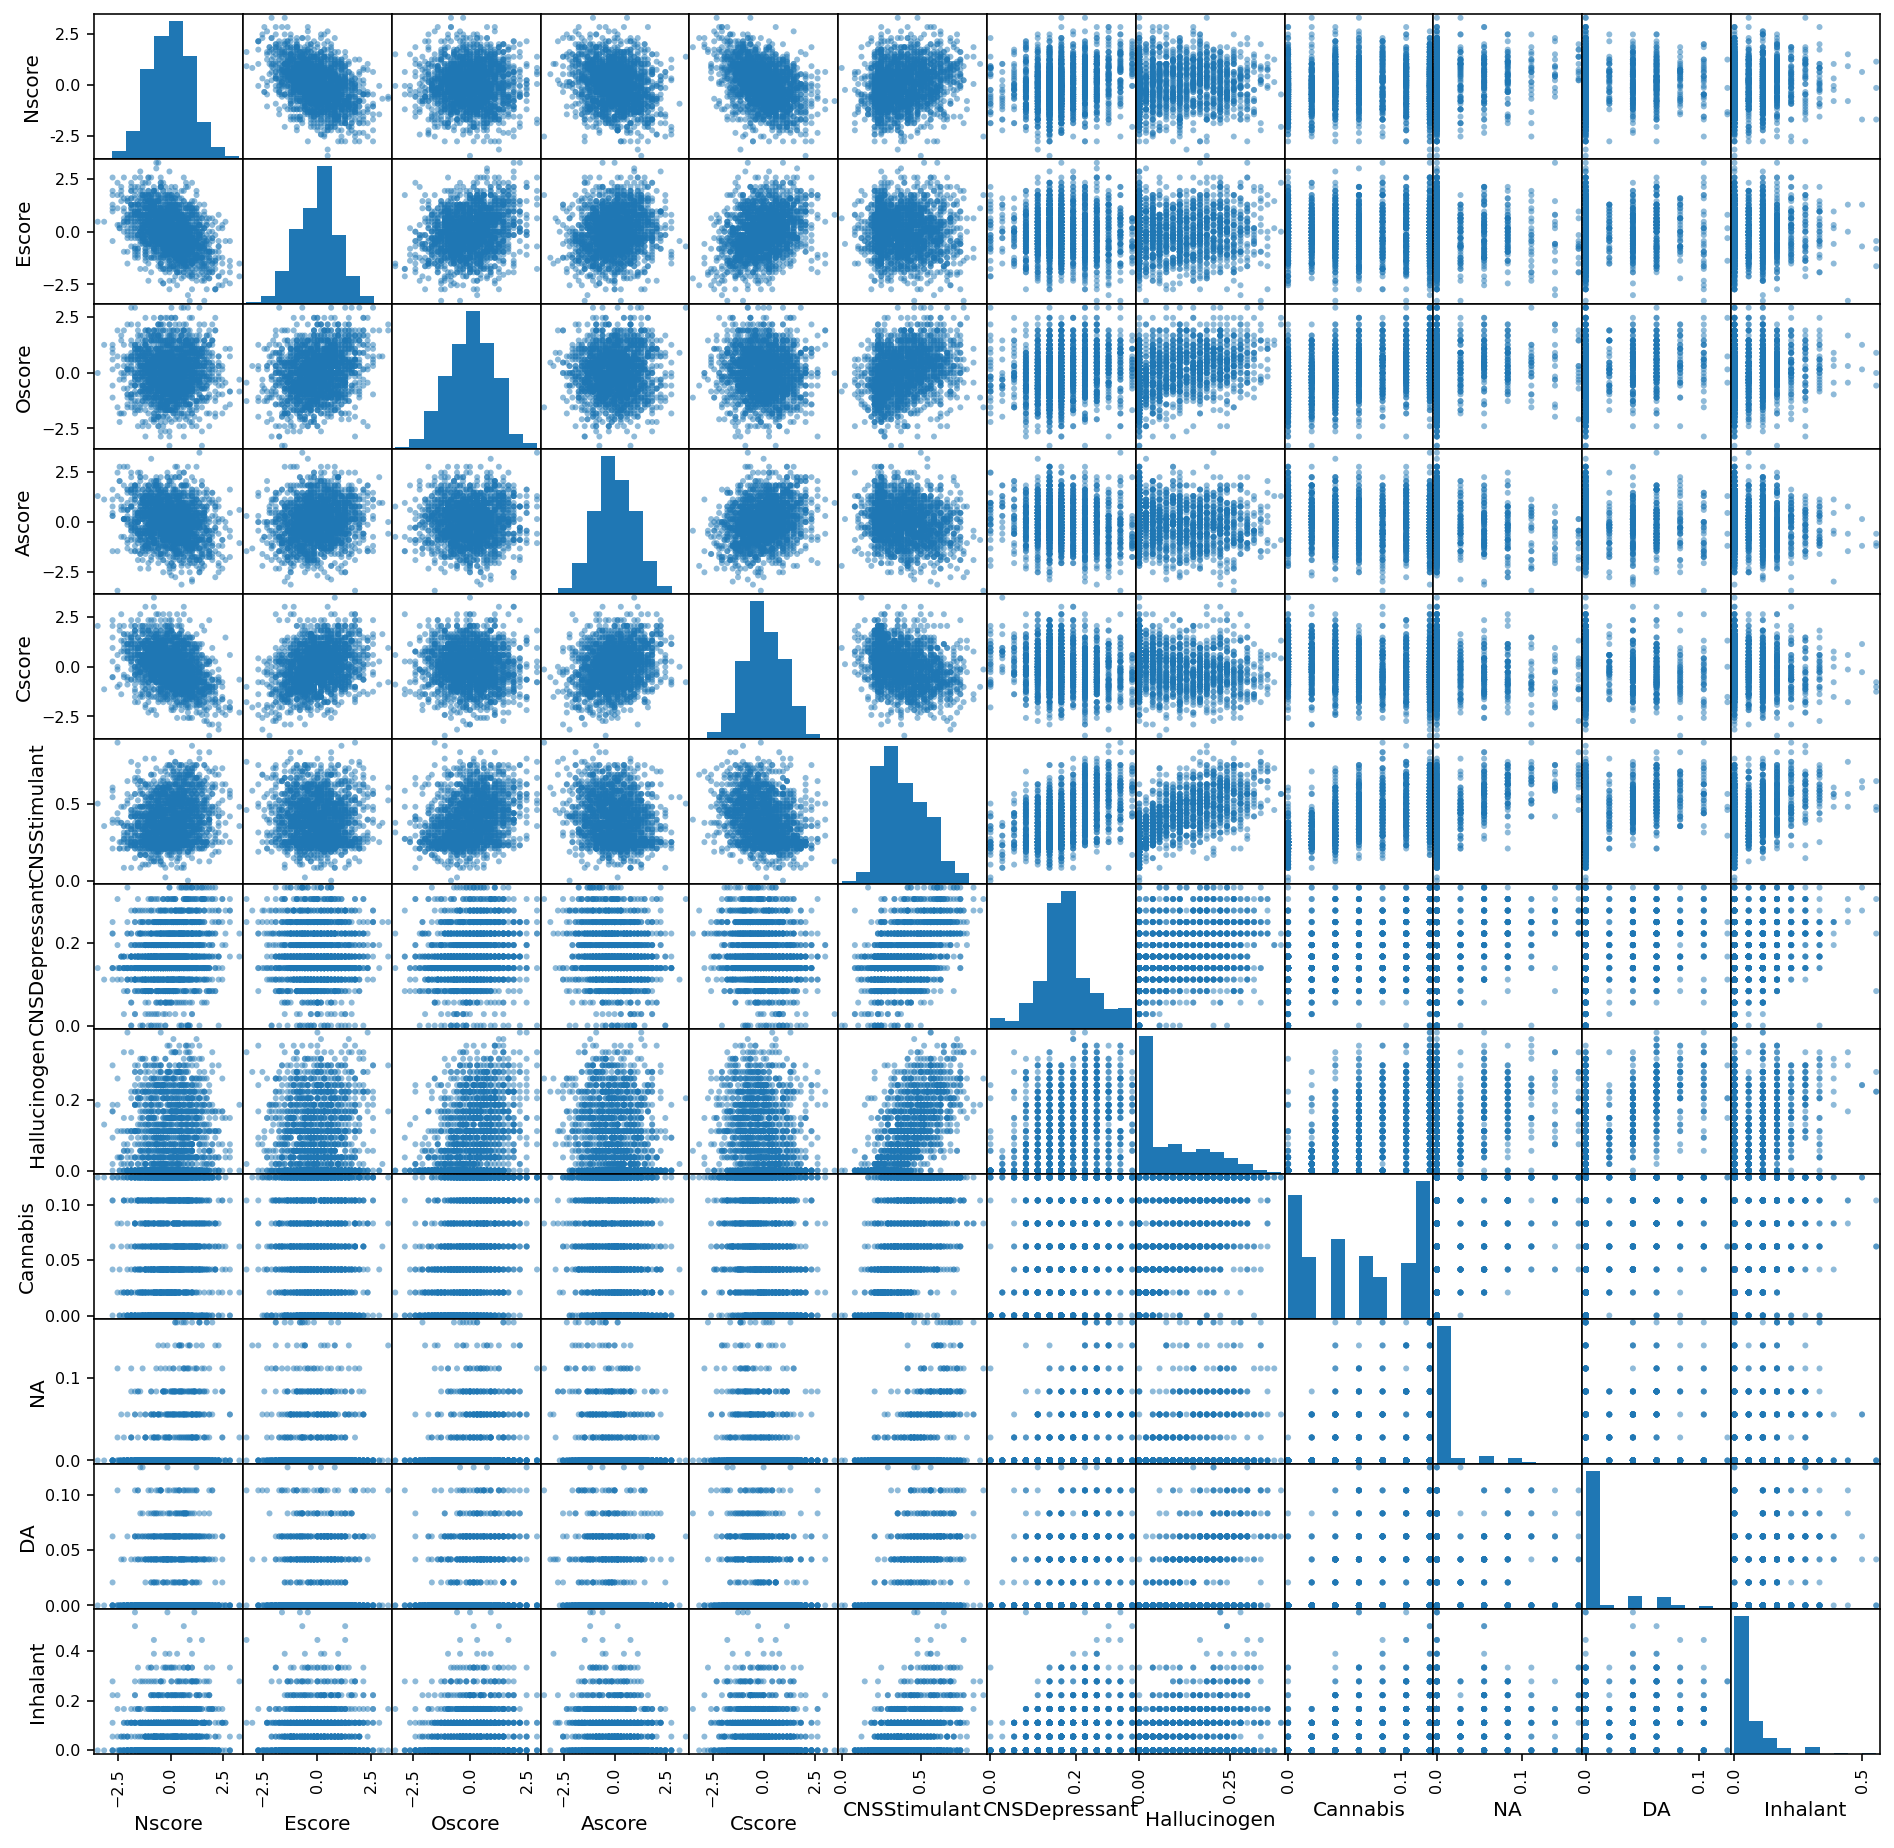

In [728]:
fig = pd.plotting.scatter_matrix(df_new, figsize=(16, 16))

From the plot above, it was too difficult to visually see any correlations.

Then we decided to make a heatmap of the correlations, which showed the correlations between the data more clearly. For example, there is a positive correlation between Hallucinogen and Oscores, meaning that people who are more likely to use drugs in Hallucinogen category score high in openness to experience. A negative correlation exists between CNS Stimulant and Cscore, meaning that people who are more likely to use drugs in CNS Stimulant category score low in conscientiousness. However, the Pearson scores are all less than |.5| meaning that the correlation between the variables are all low.

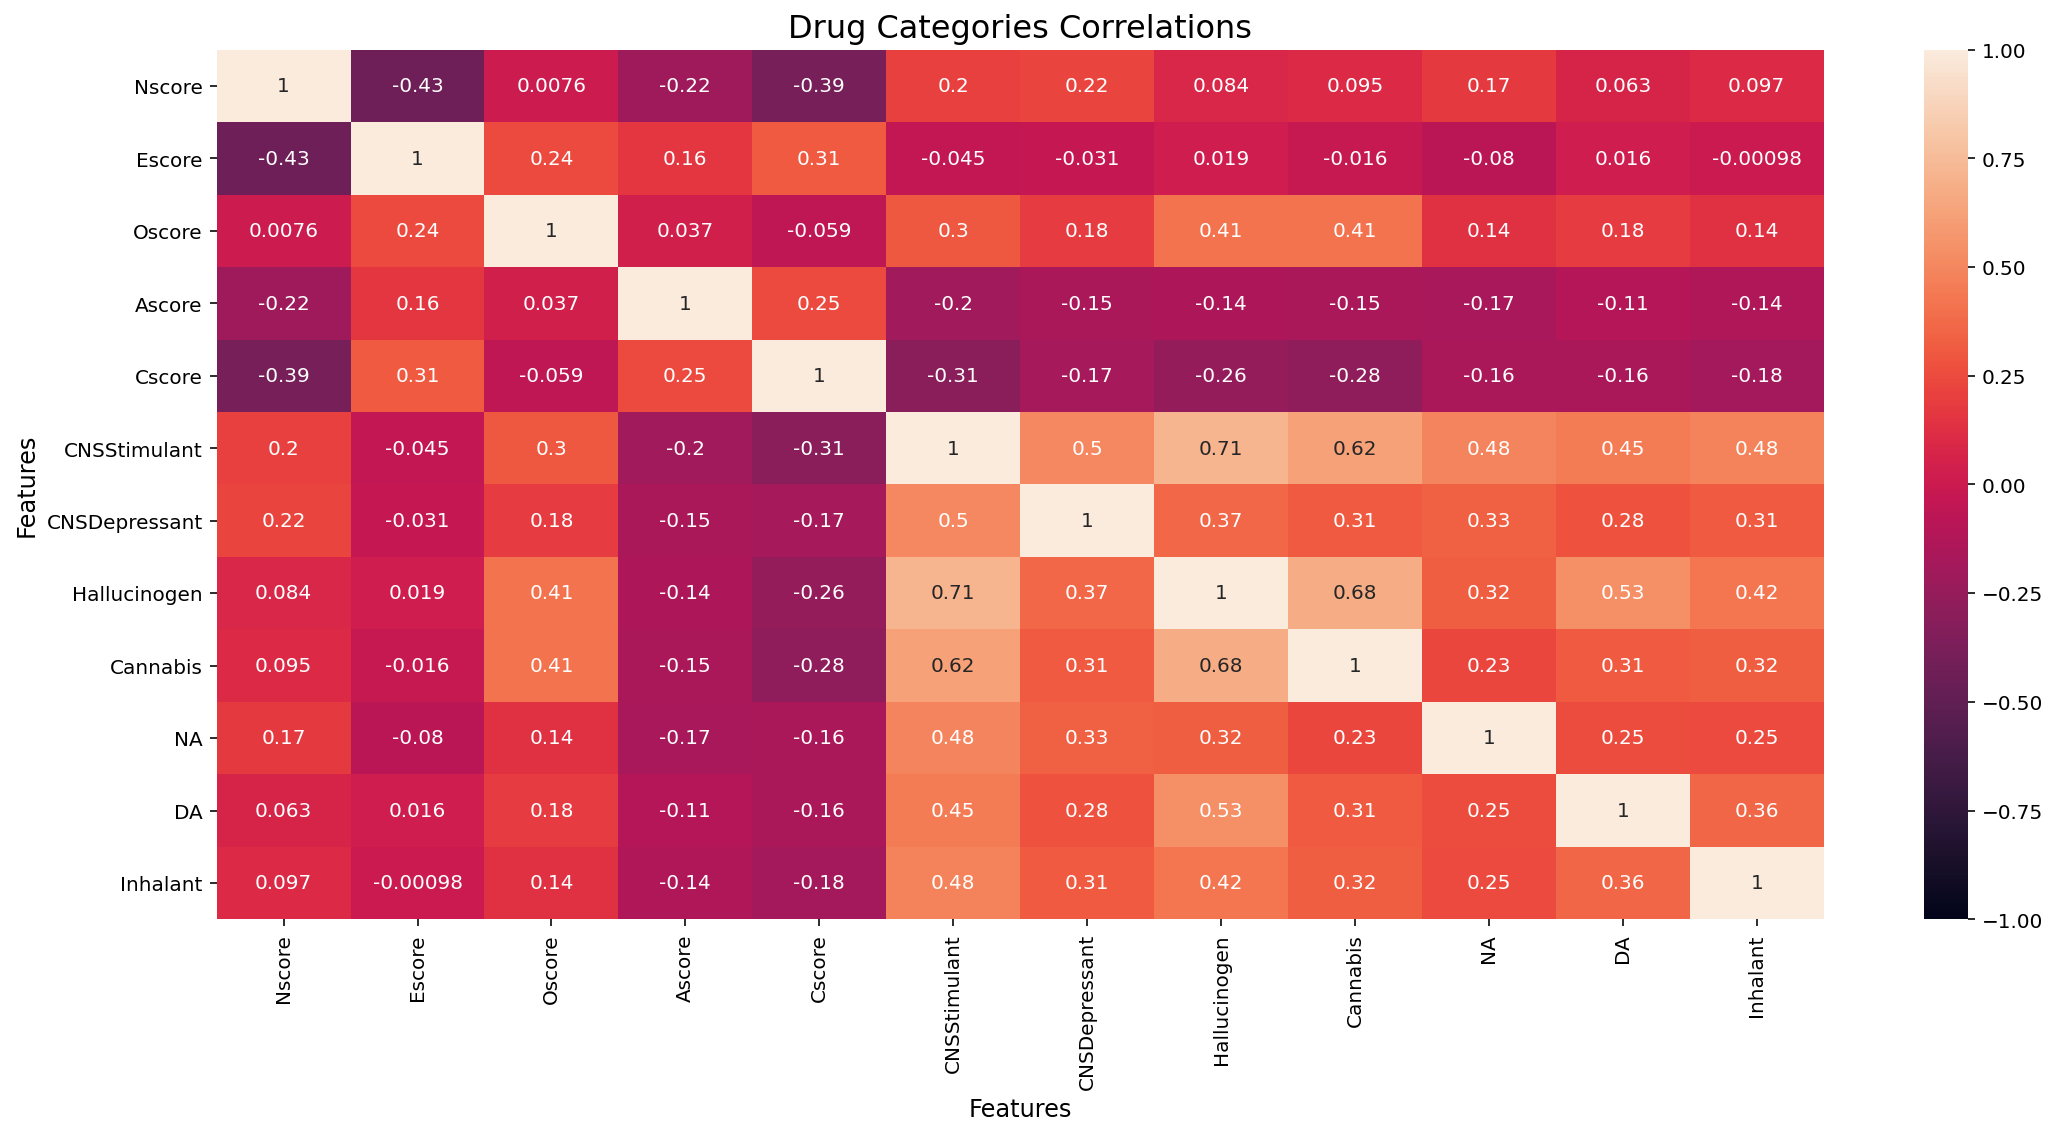

In [729]:
corr = df_new.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Drug Categories Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

### PCA

Another approach is to apply PCA on the features and see which ones capture the most information, i.e. which drugs are better predictors of personality type. Since our objective is to predict the personality type, we need to convert the each of the personality score to categorical label: 0 (lower range), 1 (middle range), and 2 (higher range). Since we know that the all of the personality scores are in the range from -3.5 to 3.5, we can divide the scores into 3 subcategories. 

In [730]:
def convert_personality_score(score):
    if score < -1.167:
        # lower range
        label = 0
    elif score < 1.167:
        # mid range
        label = 1
    else:
        # higher range
        label = 2
    return label

In [731]:
df_new['Nlabel'] = df_new['Nscore'].apply(convert_personality_score)
df_new['Elabel'] = df_new['Escore'].apply(convert_personality_score)
df_new['Olabel'] = df_new['Oscore'].apply(convert_personality_score)
df_new['Alabel'] = df_new['Ascore'].apply(convert_personality_score)
df_new['Clabel'] = df_new['Cscore'].apply(convert_personality_score)

In [732]:
df_new.head()

Nscore   Escore   Oscore   Ascore   Cscore  CNSStimulant  CNSDepressant  \
0 -0.67825  1.93886  1.43533  0.76096 -0.14277      0.500000       0.138889   
1 -0.46725  0.80523 -0.84732 -1.62090 -1.01450      0.208333       0.166667   
2 -0.14882 -0.80615 -0.01928  0.59042  0.58489      0.270833       0.194444   
3  0.73545 -1.63340 -0.45174 -0.30172  1.30612      0.333333       0.111111   
4 -0.67825 -0.30033 -1.55521  2.03972  1.63088      0.333333       0.055556   

   Hallucinogen  Cannabis   NA        DA  Inhalant  Nlabel  Elabel  Olabel  \
0      0.111111  0.083333  0.0  0.041667  0.111111       1       2       2   
1      0.018519  0.062500  0.0  0.000000  0.000000       1       1       1   
2      0.000000  0.041667  0.0  0.041667  0.000000       1       1       1   
3      0.074074  0.062500  0.0  0.000000  0.055556       1       0       1   
4      0.000000  0.000000  0.0  0.000000  0.000000       1       1       0   

   Alabel  Clabel  
0       1       1  
1       0       1  
2       1       1  
3       1       2  
4       2       2

Normalize the features in order to use PCA.

In [733]:
features = np.array(categories)

In [734]:
x = df_new.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [735]:
# Print the mean and variance of the normalized features
np.mean(x),np.std(x)

(5.410773193421415e-17, 0.9999999999999999)

We see that now our features are normalized (i.e. normally distributed with 0 mean and 1 variance).

Now, we can apply PCA to our features and see which principal components holds the most information.

In [736]:
pca = PCA()
PC_drugs = pca.fit_transform(x)

Now, the importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude meaning higher importance.)

Let's see first what amount of variance does each PC explains.

In [737]:
pca.explained_variance_ratio_

array([0.50200791, 0.12686224, 0.10817908, 0.09713673, 0.09040981,
       0.04153722, 0.03386701])

PC1 explains $50.2\%$, PC2 $12.7\%$, PC3 $10.8\%$, PC4 $9.7\%$, PC5 $9.04\%$, PC6 $4.15\%$, and PC7 $3.4\%$.

Now, let's find the most important features. Since PC1 holds the most variance (significanly compared to other PCs), we can evaluate only on the first principal component.

In [738]:
abs(pca.components_[0])

array([0.47158889, 0.326066  , 0.45254148, 0.38986551, 0.29500311,
       0.34082014, 0.3336327 ])

Each element in the array represents the contribution of each feature to the first principal component. Based on that, we can conclude that **CNS Stimulant** and **Hallucinogen** are the most important predictors of personality type.

 ### Multivariate Linear Regression Models

Here, we will compare two multivariate linear regression models, in which first we use the 2 most important features from the PCA results above, and second we use the first two principal components to predict the personality type.

First, let's see the scatter plots of the data before and after PCA.

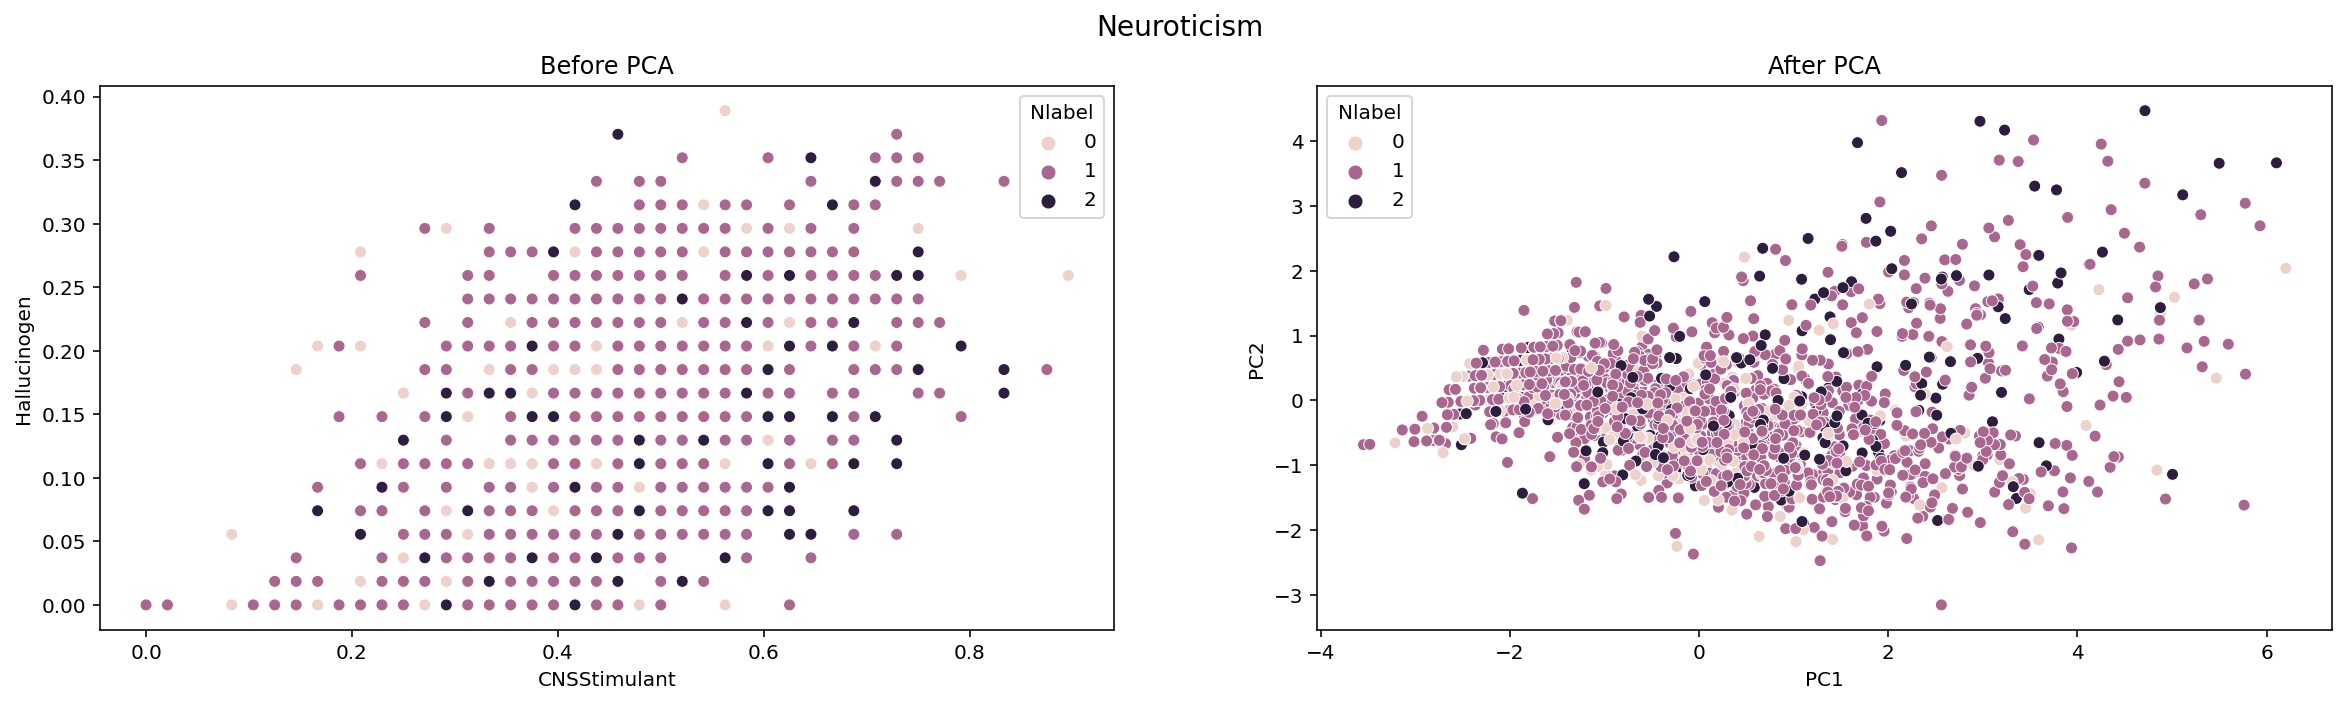

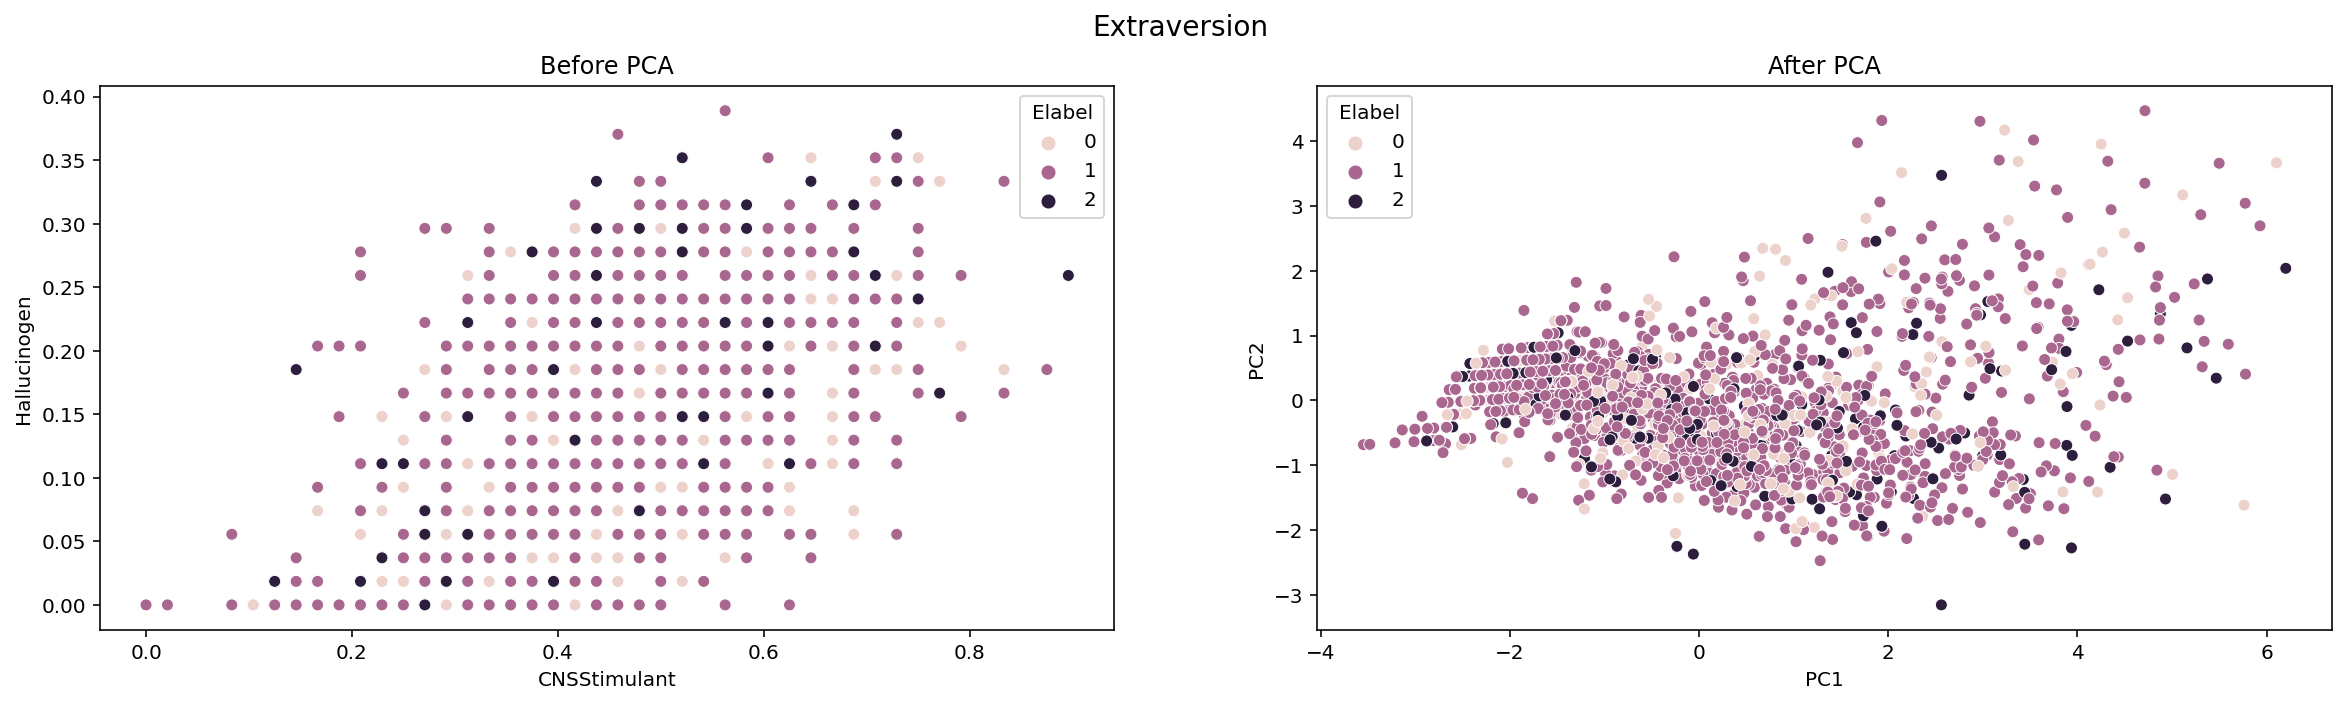

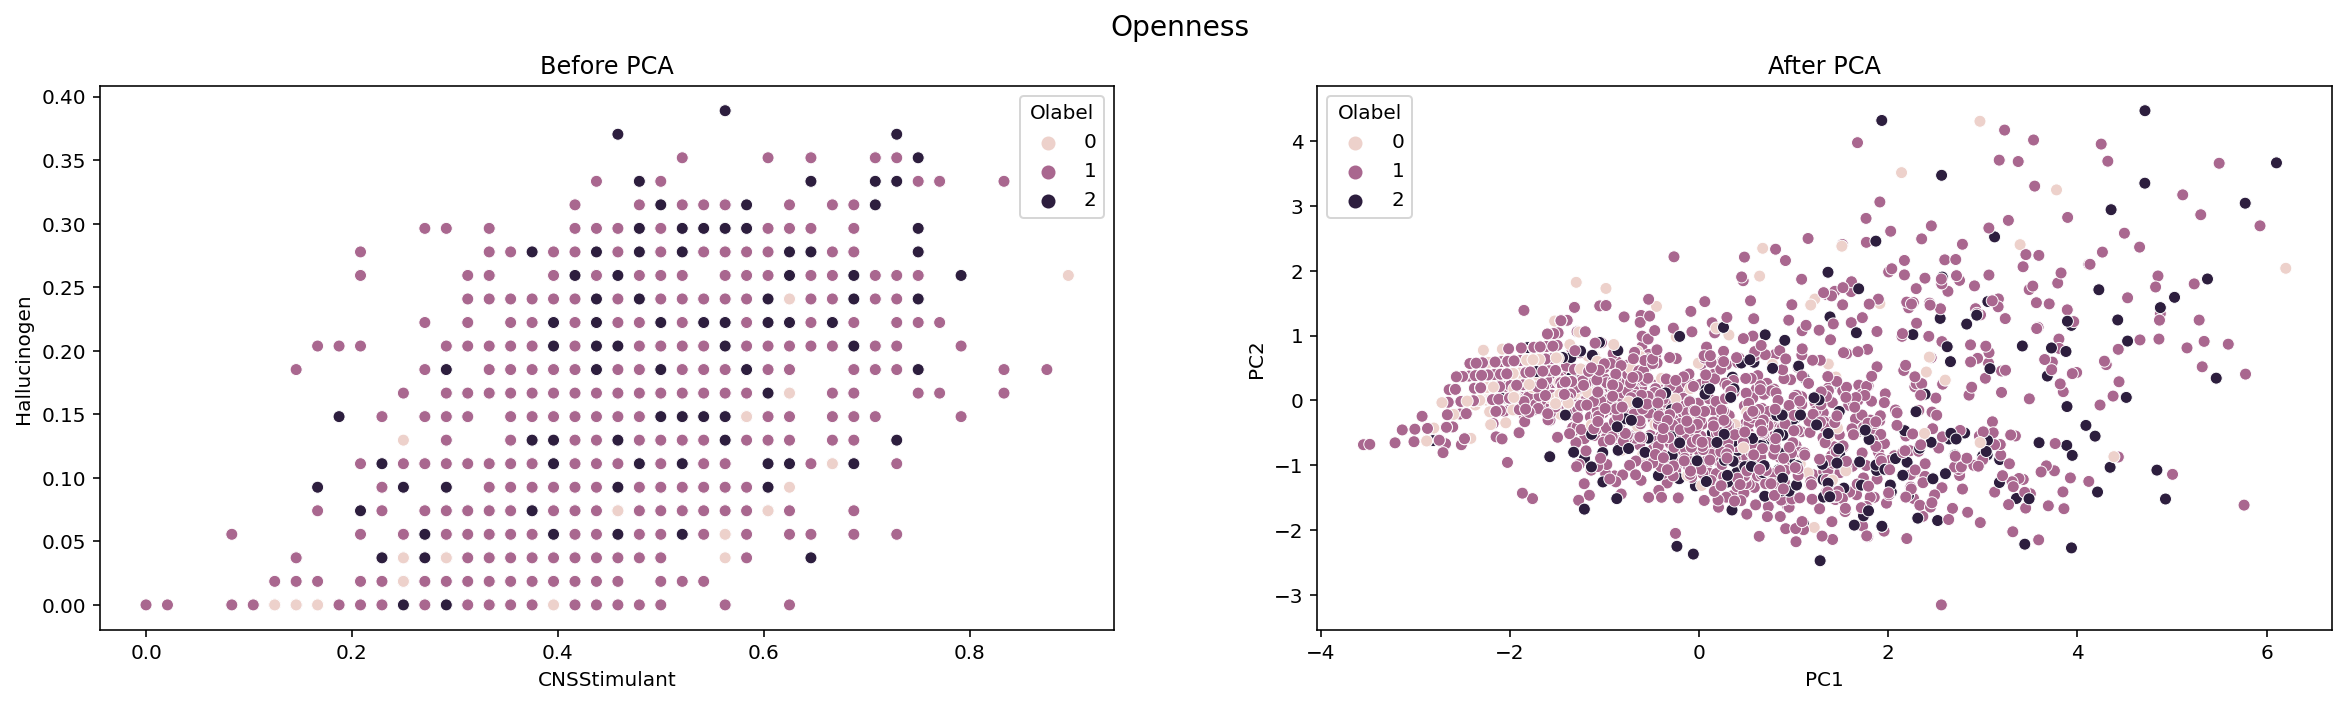

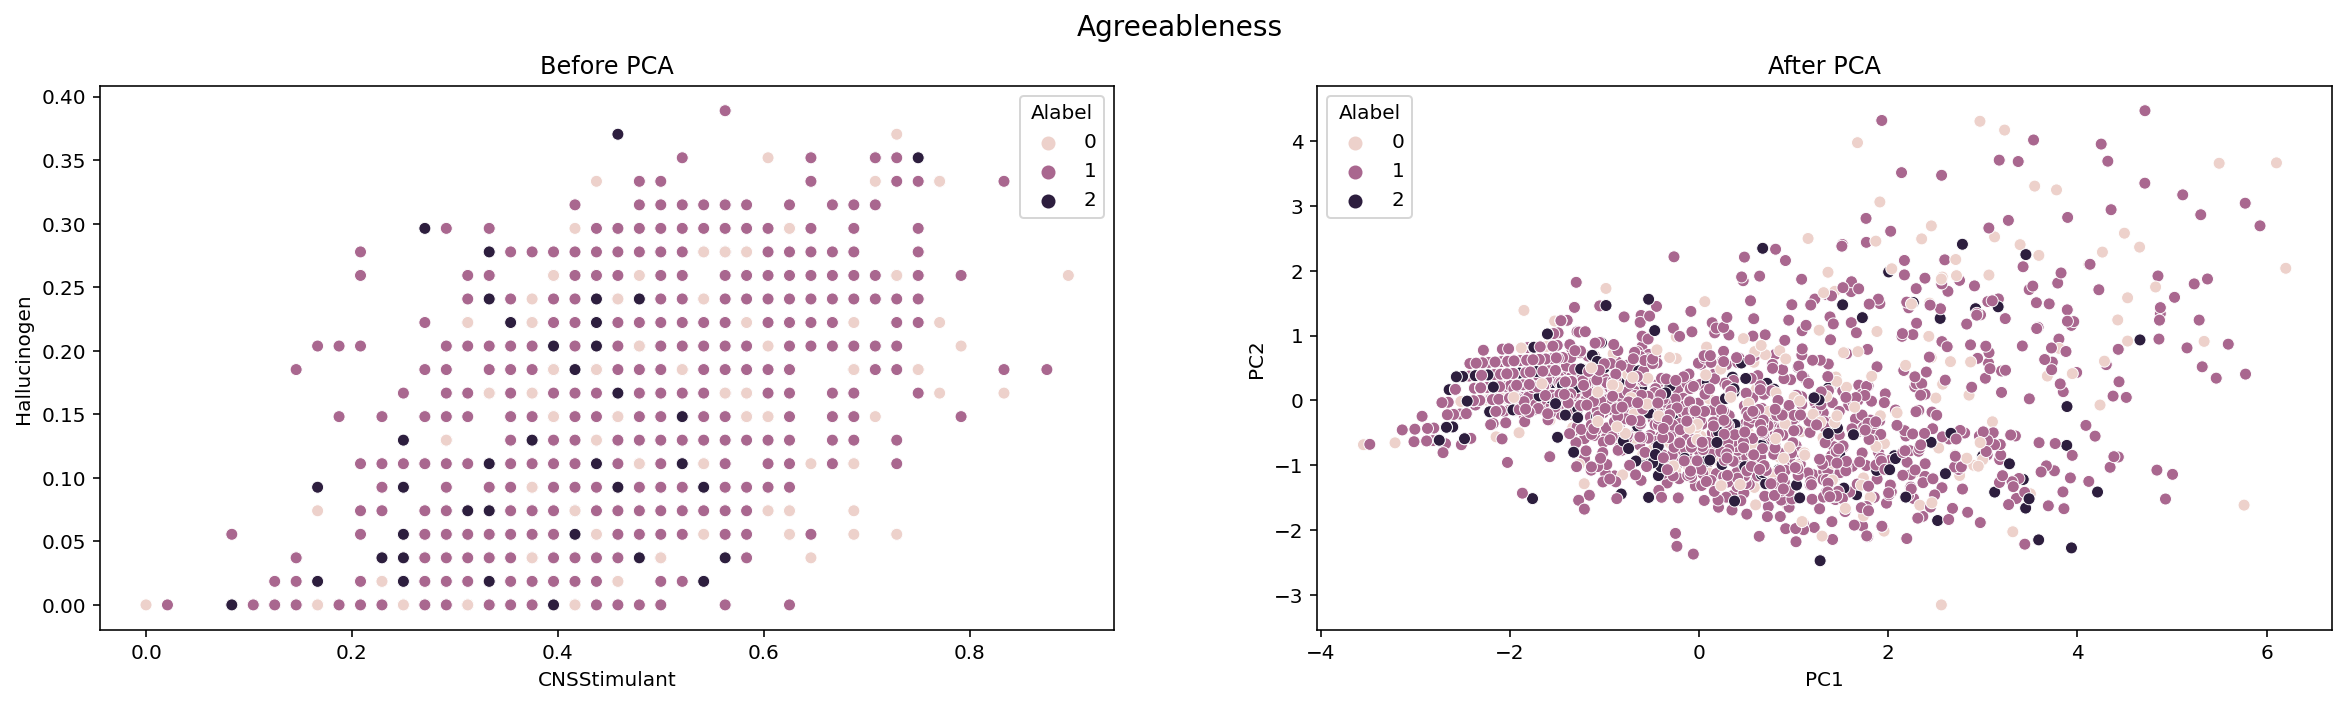

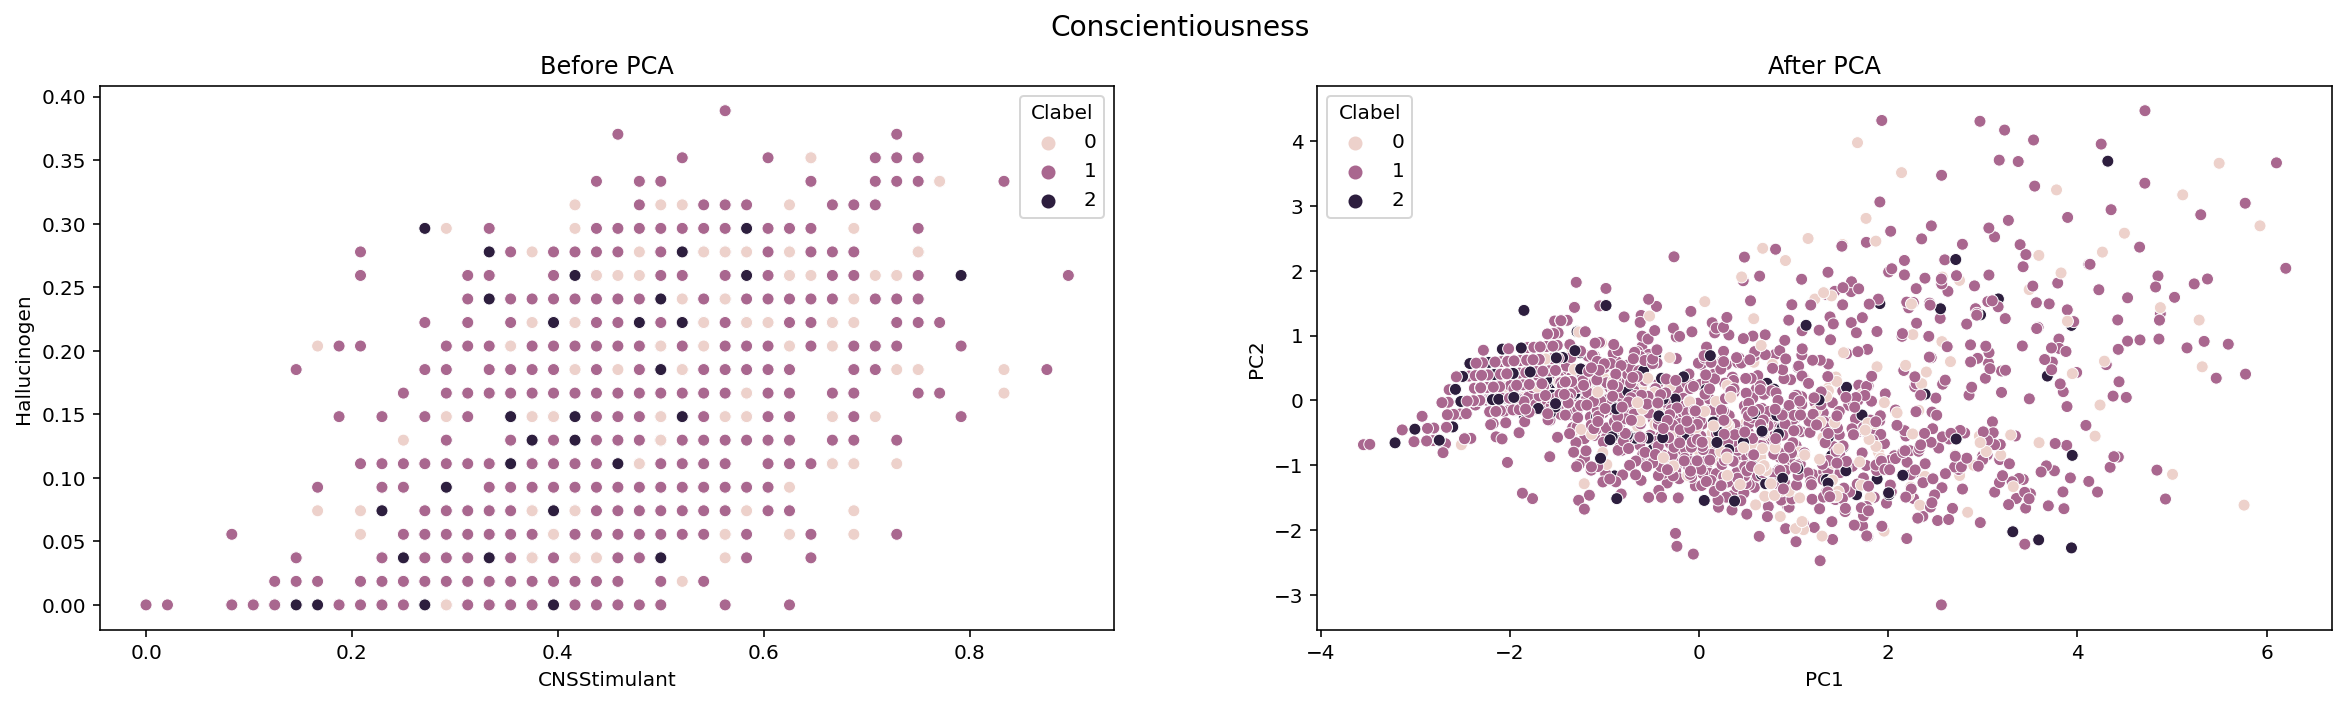

In [739]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Neuroticism', fontsize=14)
sns.scatterplot(ax=axes[0], data=df_new, x='CNSStimulant', y='Hallucinogen', hue='Nlabel')
axes[0].set_title('Before PCA')
sns.scatterplot(ax=axes[1], data=df_principal, x='PC1', y='PC2', hue='Nlabel', hue_order=labels)
axes[1].set_title('After PCA')

fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Extraversion', fontsize=14)
sns.scatterplot(ax=axes[0], data=df_new, x='CNSStimulant', y='Hallucinogen', hue='Elabel')
axes[0].set_title('Before PCA')
sns.scatterplot(ax=axes[1], data=df_principal, x='PC1', y='PC2', hue='Elabel', hue_order=labels)
axes[1].set_title('After PCA')

fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Openness', fontsize=14)
sns.scatterplot(ax=axes[0], data=df_new, x='CNSStimulant', y='Hallucinogen', hue='Olabel')
axes[0].set_title('Before PCA')
sns.scatterplot(ax=axes[1], data=df_principal, x='PC1', y='PC2', hue='Olabel', hue_order=labels)
axes[1].set_title('After PCA')

fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Agreeableness', fontsize=14)
sns.scatterplot(ax=axes[0], data=df_new, x='CNSStimulant', y='Hallucinogen', hue='Alabel')
axes[0].set_title('Before PCA')
sns.scatterplot(ax=axes[1], data=df_principal, x='PC1', y='PC2', hue='Alabel', hue_order=labels)
axes[1].set_title('After PCA')

fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Conscientiousness', fontsize=14)
sns.scatterplot(ax=axes[0], data=df_new, x='CNSStimulant', y='Hallucinogen', hue='Clabel')
axes[0].set_title('Before PCA')
sns.scatterplot(ax=axes[1], data=df_principal, x='PC1', y='PC2', hue='Clabel', hue_order=labels)
axes[1].set_title('After PCA')

plt.show()

As we can see from the PCA space above, the variance is maximized along PC1 (explains $50.2\%$ of the variance) and PC2 (explains $12.7\%$ of the variance). Together, they explain $62.9\%$.

#### Predictors: CNS Stimulant and Hallucinogen

In [740]:
adj_rsquared = []

In [741]:
outcome, predictors = patsy.dmatrices('Nscore ~ CNSStimulant + Hallucinogen', df_new)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared.append(res.rsquared)

In [742]:
outcome, predictors = patsy.dmatrices('Escore ~ CNSStimulant + Hallucinogen', df_new)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared.append(res.rsquared)

In [743]:
outcome, predictors = patsy.dmatrices('Oscore ~ CNSStimulant + Hallucinogen', df_new)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared.append(res.rsquared)

In [744]:
outcome, predictors = patsy.dmatrices('Ascore ~ CNSStimulant + Hallucinogen', df_new)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared.append(res.rsquared)

In [745]:
outcome, predictors = patsy.dmatrices('Cscore ~ CNSStimulant + Hallucinogen', df_new)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared.append(res.rsquared)

#### Predictors: Principal Component 1 and Principal Component 2

In [746]:
df_1 = pd.DataFrame(data=PC_drugs.T[:2].T, columns=['PC1', 'PC2'])
df_2 = df_new[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Nlabel', 'Elabel', 'Olabel', 'Alabel', 'Clabel']]

In [747]:
df_principal = pd.concat([df_1, df_2], axis=1)

In [748]:
adj_rsquared_PCA = []

In [749]:
outcome, predictors = patsy.dmatrices('Nscore ~ PC1 + PC2', df_principal)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared_PCA.append(res.rsquared)

In [750]:
outcome, predictors = patsy.dmatrices('Escore ~ PC1 + PC2', df_principal)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared_PCA.append(res.rsquared)

In [751]:
outcome, predictors = patsy.dmatrices('Oscore ~ PC1 + PC2', df_principal)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared_PCA.append(res.rsquared)

In [752]:
outcome, predictors = patsy.dmatrices('Ascore ~ PC1 + PC2', df_principal)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared_PCA.append(res.rsquared)

In [753]:
outcome, predictors = patsy.dmatrices('Cscore ~ PC1 + PC2', df_principal)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
adj_rsquared_PCA.append(res.rsquared)

#### Results

In [754]:
pd.DataFrame(data=adj_rsquared).T.rename(index={0:'Adj. R-squared'}, columns={0:'Nscore',1:'Escore',2:'Oscore',3:'Ascore',4:'Cscore'}).style.set_caption('Predictors: CNS Stimulant and Hallucinogen')

The best result if we were to use **CNS Stimulant** and **Hallucinogen** to predict the personality is for **Oscore**, in which only $16.9\%$ of the variability in the outcome data can be explained by the model.

In [755]:
pd.DataFrame(data=adj_rsquared_PCA).T.rename(index={0:'Adj. R-squared'}, columns={0:'Nscore',1:'Escore',2:'Oscore',3:'Ascore',4:'Cscore'}).style.set_caption('Predictors: Principal Component 1 and Principal Component 2')

Similarly, the best result if we were to use **Principle Component 1** and **Principle Component 2** to predict the personality is for **Oscore**, in which only $16\%$ of the variability in the outcome data can be explained by the model.

# Ethics & Privacy

Since the dataset we are going to be dealing with is drug-use and personality surveys, there are definitely some ethics and privacy issues to acknowledge. First, the survey respondents were assigned an ID in the dataset so there is no way to connect their responses to their personal information. Their age, gender, ethnicity, etc are real, however the number of UCI students is so large there is no way to identify the participants of the study. There are no privacy concerns because each participant elected to be a part of the survey so there was informed consent. However, it is unclear how this survey data was gathered.

There were 1886 respondents with a wide range of ages (18-65+) and were 50% male and 50% female, which creates a fairly unbiased sample for those factors. However, 85% were from either the US or UK and 91% were white, which could be an issue of bias (WASP sample), but we will address this sampling bias in our analysis. Lastly, 27% had some college education, 25% had a degree, and 48% were other

# Conclusion & Discussion

The heat map shows that the Pearson's $r$ scores are all less than $|.5|$ meaning that the correlation between the variables are all low. After applying PCA, we found out that the *CNS Stimulant* and *Hallucinogen* capture the most information, in which we can say that those features are better predictors of personality type compared to the rest of the features. Then, we used the Multivariate Regression Model to see if we can fit a line into our data using CNS Stimulant and Hallucinogen variables. Furthermore, we tried to compare our model using the first two principal components that we got from PCA. After applying the OLS test, both models turned out to give very low ```Adj. R-squared``` values. As all of our ```Adj. R-squared``` values are approaching $0$, we can conclude that there is no correlation between drug consumption and personality type. Therefore, we reject our initial hypothesis and conclude that we cannot predict an individual's personality type based on their drug consumption.

# Team Contributions

- Hima Kathi: Ethics & Privacy, Dataset, Data Cleaning, helped form research question and initial correlation tests, script for video.
- Rasya Soeroso: Dataset, Data Cleaning, Data Analysis & Results, Conclusion & Discussion.
- Kayla Sacks: Background and Prior Work, Data Cleaning, helped with hypothesis and the video.
- Brian Xie: Slides and video.